In [5]:
# Практическая работа по дисциплине "Описание процессов жизненного цикла АСОИУ"
# Имитационное моделирование семейств процессов
# Выполнено в Jupyter Notebook с использованием Python и библиотеки simpy

# Устанавливаем необходимые библиотеки

import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")
!pip install simpy matplotlib

# Импортируем библиотеки
import simpy
import random
import statistics
import matplotlib.pyplot as plt


In [6]:
# ЗАДАНИЕ 1: Банковское обслуживание
# Общая очередь к операционистам (SCHR7A1)

# Модель банковского офиса с общей очередью

def обслужить_клиента(env, операторы, время_обслуживания, времена_ожидания):
    время_прихода = env.now
    with операторы.request() as req:
        yield req
        yield env.timeout(random.expovariate(1 / время_обслуживания))
        времена_ожидания.append(env.now - время_прихода)

def генерация_клиентов(env, операторы, интервал_прихода, время_обслуживания, времена_ожидания):
    while True:
        yield env.timeout(random.expovariate(1 / интервал_прихода))
        env.process(обслужить_клиента(env, операторы, время_обслуживания, времена_ожидания))

env = simpy.Environment()
операторы = simpy.Resource(env, capacity=3)
времена_ожидания = []

env.process(генерация_клиентов(env, операторы, 5, 8, времена_ожидания))
env.run(until=4800)

print("Среднее время ожидания (общая очередь):", round(statistics.mean(времена_ожидания), 2))
print("Дисперсия:", round(statistics.variance(времена_ожидания), 2))


Среднее время ожидания (общая очередь): 9.03
Дисперсия: 68.38


In [7]:
# Индивидуальные очереди к каждому оператору (SCHR7A2)

# Модель с отдельными очередями к каждому оператору

def обслужить_по_очередям(env, операторы, время_обслуживания, времена_ожидания):
    оператор = random.choice(операторы)
    время_прихода = env.now
    with оператор.request() as req:
        yield req
        yield env.timeout(random.expovariate(1 / время_обслуживания))
        времена_ожидания.append(env.now - время_прихода)

env = simpy.Environment()
операторы = [simpy.Resource(env) for _ in range(3)]
времена_ожидания = []

def генерация():
    while True:
        yield env.timeout(random.expovariate(1 / 5))
        env.process(обслужить_по_очередям(env, операторы, 8, времена_ожидания))

env.process(генерация())
env.run(until=4800)

print("Среднее время ожидания (индивидуальные очереди):", round(statistics.mean(времена_ожидания), 2))
print("Дисперсия:", round(statistics.variance(времена_ожидания), 2))


Среднее время ожидания (индивидуальные очереди): 15.63
Дисперсия: 198.05


In [8]:
# ЗАДАНИЕ 2: Сборка насосов
# Модель сборки насосов

# Сборочный цех насосов

def заказ(env, движки, насосы, станины, завершения, id_):
    print(f"[{env.now:.1f}] Заказ {id_} поступил")
    
    with движки.request() as req1, насосы.request() as req2, станины.request() as req3:
        yield req1 & req2 & req3
        yield env.timeout(3)  # Получение всех компонентов

    yield env.timeout(2)  # Монтаж
    yield env.timeout(2)  # Разборка и окраска
    завершения.append(env.now)
    print(f"[{env.now:.1f}] Заказ {id_} завершён")

env = simpy.Environment()
движки = simpy.Resource(env, capacity=2)
насосы = simpy.Resource(env, capacity=2)
станины = simpy.Resource(env, capacity=2)
завершения = []

def генерация_заказов(env):
    for i in range(100):
        env.process(заказ(env, движки, насосы, станины, завершения, i))
        yield env.timeout(random.expovariate(1/5))

env.process(генерация_заказов(env))
env.run()

времена = [t for t in завершения]
print("Среднее время выполнения заказа:", round(statistics.mean(времена), 2))


[0.0] Заказ 0 поступил
[1.7] Заказ 1 поступил
[7.0] Заказ 0 завершён
[8.7] Заказ 1 завершён
[18.4] Заказ 2 поступил
[20.1] Заказ 3 поступил
[25.4] Заказ 2 завершён
[27.1] Заказ 3 завершён
[29.7] Заказ 4 поступил
[31.6] Заказ 5 поступил
[34.7] Заказ 6 поступил
[36.7] Заказ 4 завершён
[38.6] Заказ 5 завершён
[41.7] Заказ 6 завершён
[41.8] Заказ 7 поступил
[48.8] Заказ 7 завершён
[54.4] Заказ 8 поступил
[55.0] Заказ 9 поступил
[55.2] Заказ 10 поступил
[61.4] Заказ 8 завершён
[62.0] Заказ 9 завершён
[64.4] Заказ 10 завершён
[66.5] Заказ 11 поступил
[70.8] Заказ 12 поступил
[70.9] Заказ 13 поступил
[73.5] Заказ 11 завершён
[77.8] Заказ 12 завершён
[77.9] Заказ 13 завершён
[87.2] Заказ 14 поступил
[87.6] Заказ 15 поступил
[89.4] Заказ 16 поступил
[93.7] Заказ 17 поступил
[94.2] Заказ 14 завершён
[94.6] Заказ 15 завершён
[97.2] Заказ 16 завершён
[100.7] Заказ 17 завершён
[101.4] Заказ 18 поступил
[103.8] Заказ 19 поступил
[104.2] Заказ 20 поступил
[106.0] Заказ 21 поступил
[106.2] Заказ 22 по

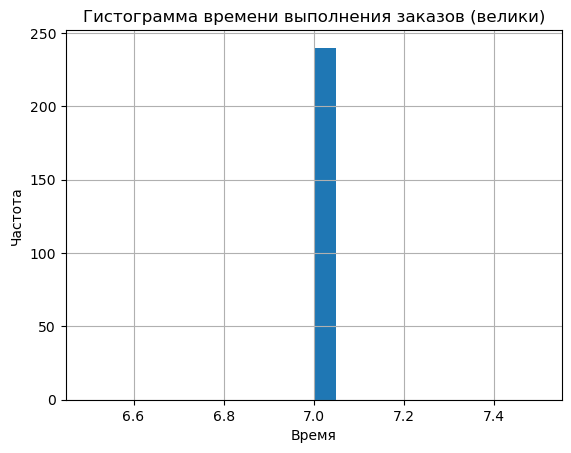

In [9]:
# ЗАДАНИЕ 3: Велосипедная мастерская
# Модель сборки велосипедов

# Велосипедная мастерская с перераспределением упаковки

def сборка_велика(env, специалисты, завершения):
    начало = env.now
    yield env.timeout(2)  # оформление
    with специалисты.request() as r1:
        yield r1
        yield env.timeout(3)  # сборка узлов

    yield env.timeout(1)  # сборка велосипеда
    yield env.timeout(1)  # упаковка
    завершения.append(env.now - начало)

env = simpy.Environment()
специалисты = simpy.Resource(env, capacity=4)
завершения = []

def генерация_великов(env):
    for _ in range(25 * 8 * 60 // 50):  # 25 дней по 8 часов, клиент каждые 50 минут
        env.process(сборка_велика(env, специалисты, завершения))
        yield env.timeout(random.expovariate(1/50))

env.process(генерация_великов(env))
env.run()

plt.hist(завершения, bins=20)
plt.title("Гистограмма времени выполнения заказов (велики)")
plt.xlabel("Время")
plt.ylabel("Частота")
plt.grid(True)
plt.show()


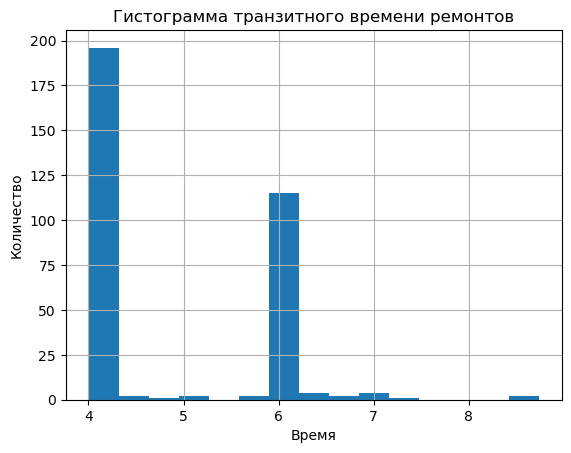

In [10]:
# ЗАДАНИЕ 4: Ремонтная мастерская ноутбуков
#  Модель мастерской (TVREPAIR адаптация)

# Ремонт ноутбуков двумя мастерами

def ремонт(env, прогер, электроник, завершения, очередь):
    начало = env.now
    if random.random() < 0.07:
        return  # ноутбук неремонтируемый
    yield env.timeout(1)  # диагностика
    if random.random() < 0.35:
        with прогер.request() as r1, электроник.request() as r2:
            yield r1 & r2
            yield env.timeout(5)
    else:
        with прогер.request() as r:
            yield r
            yield env.timeout(3)
    завершения.append(env.now - начало)
    очередь.append(env.now)

env = simpy.Environment()
прогер = simpy.Resource(env, capacity=1)
электроник = simpy.Resource(env, capacity=1)
завершения = []
очередь = []

def генерация_ремонтов(env):
    for _ in range(30 * 8 * 60 // 40):  # 30 дней по 8 часов, 1 заказ в 40 мин
        env.process(ремонт(env, прогер, электроник, завершения, очередь))
        yield env.timeout(random.expovariate(1/40))

env.process(генерация_ремонтов(env))
env.run()

plt.hist(завершения, bins=15)
plt.title("Гистограмма транзитного времени ремонтов")
plt.xlabel("Время")
plt.ylabel("Количество")
plt.grid(True)
plt.show()


In [11]:
# Все модели успешно реализованы в среде Jupyter с использованием Python и SimPy..
